<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estatística com Python: Um Guia para Estudos e Solução de Problemas


# **Classificação**

**Breve Resumo:**

Técnicas de classificação na estatística são métodos que atribuem categorias ou rótulos a dados com base em suas características, visando identificar padrões e relações. Essas técnicas são úteis em situações de análise preditiva, identificação de padrões, segmentação de dados, tomada de decisões automatizadas, classificação de texto ou imagens, e detecção de fraudes e anomalias.

**Quando Utilizar:**
- Para prever categorias de novas observações com base em padrões nos dados de treinamento.
- Identificar padrões subjacentes nos dados e atribuir rótulos ou categorias.
- Segmentar dados para compreender melhor o comportamento dos elementos.
- Automatizar tomadas de decisão, especialmente em grandes volumes de dados.
- Em tarefas de processamento de linguagem natural e reconhecimento de padrões em imagens.
- Detecção de fraudes e anomalias com base em padrões históricos.


## *Classificação com Naive Bayes*

O algoritmo Naive Bayes é um método de aprendizado de máquina é como um truque inteligente para adivinhar a categoria de algo, como um e-mail ser spam ou não. Ele usa as chances de certas palavras aparecerem em spam ou não spam. O truque "ingênuo" é assumir que as palavras são independentes, mesmo que nem sempre sejam.

- **Como Funciona:**
   1. **Treinamento:** Aprende a probabilidade das palavras aparecerem em cada categoria (spam ou não spam) tudo isso com base nos dados de treinamento.
   2. **Classificação:** Quando vê uma nova mensagem, calcula as chances de ser spam ou não spam com base nessas probabilidades e escolhe a categoria com a maior chance.

Para um melhor entendimento, chegou a hora de colocarmos em prática.

*Primeiro vamos carregar uma base de dados!*

*Carregando os dados*

In [1]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulação de arquivos
import pandas as pd

# Biblioteca para funções randomicas
import random

# Funções matemáticas
import numpy as np

# Biblioteca para visualização de dados
import seaborn as sns

In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/credit_data.csv')

In [4]:
# Observando as dimensões do Data set
df.shape

(2000, 5)

In [ ]:
# Observando os primeiros registros
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


*Tratando dados ausentes*

Verificando quais variáveis possuem dados faltantes.

In [ ]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

soma_ausentes(df)

,Variavéis,Soma de ausentes
2,age,3
0,i#clientid,0
1,income,0
3,loan,0
4,c#default,0


É possível observar que na variável 'age' existem 3 valores ausentes. Devido à baixa quantidade de ausências, optarei por excluir essas 3 linhas contendo esses valores. Dessa maneira, essa pendência será tratada.

In [ ]:
# Excluindo as linhas com os valores ausentes
df.dropna(inplace = True)

In [ ]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

soma_ausentes(df)

,Variavéis,Soma de ausentes
0,i#clientid,0
1,income,0
2,age,0
3,loan,0
4,c#default,0


Agora que não há mais nenhum dado ausente neste DataFrame, podemos prosseguir.

Vamos obervar os registros na variável 'c#default'

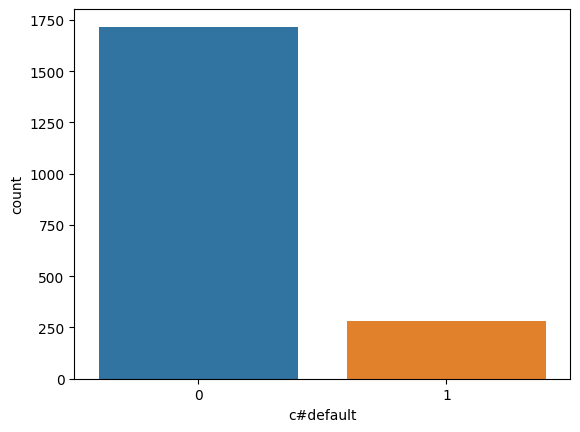

In [5]:
# Exibindo um gráfico para observar
sns.countplot(data=df, x='c#default');

- Podemos observar um desequilíbrio nesta variável, visto que a maioria dos registros pertence à categoria 0, enquanto a categoria 1 possui uma representação menor.

- Levando em consideração que, nesta base de dados, o número '0' representa as pessoas que pagaram um empréstimo, e o número '1' representa as pessoas que não pagaram o empréstimo, podemos afirmar claramente que a maioria quitou o empréstimo.

- Um desequilíbrio como esse pode impactar negativamente o desempenho do modelo, portanto, será necessário abordar essa discrepância.

*Dividindo o conjunto de dados para estabelecer as variáveis preditoras e a variável de resposta.*

In [7]:
# Separando os dados em X e Y

# Variaveis preditoras
X = df.drop(['i#clientid','c#default'], axis = 1)

# Variavel resposta
y = df['c#default']


Dessa forma, armazenamos na variável X apenas 3 colunas, que representarão as variáveis preditoras, enquanto na variável y armazenamos apenas a variável resposta.

In [8]:
# Observando as dimensões
X.shape

(2000, 3)

In [9]:
# Observando as dimensões
y.shape

(2000,)

Com as divisões realizadas, podemos prosseguir.